In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [34]:
data_path = "../data/"
#data_path = ""
data_file = data_path+"Frogs_MFCCs.csv"
data = pd.read_csv(data_file)
#print(data.shape)

col=list( data.columns)
labels = col[-2:-5:-1]

x = data[sorted(list(set(col)-set(col[-1:-5:-1])))]
y = data[labels]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)
#print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(x.shape, y.shape)

(7195, 22) (7195, 3)


2. K-Means Clustering on a Multi-Class and Multi-Label Data Set
Monte-Carlo Simulation: Perform the following procedures 50 times, and report
the average and standard deviation of the 50 Hamming Distances that you calculate.


(a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split
the data into train and test, as we are not performing supervised learning in this
exercise). Choose k ∈ {1, 2, . . . , 50} automatically based on one of the methods
provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any
other method you know.


(b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

(c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss5 between the true labels and the labels assigned by clusters.


In [36]:
#ref - https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
#http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.metrics import silhouette_score

def optimalK(data, maxClusters=50):
    best_score = 0
    best_k = 0
    best_labels = None
    for k in range(2, maxClusters+1):
        km = KMeans(k)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        if(silhouette_avg>best_score):
            best_score = silhouette_avg
            best_labels = cluster_labels
            best_k = k
    return best_score, best_labels, best_k

In [37]:
from sklearn import preprocessing
labelEncoder = preprocessing.LabelEncoder()
labelEncoder.fit(y[labels[0]].unique().tolist())
encoded_y0 = labelEncoder.transform(y[labels[0]])

labelEncoder.fit(y[labels[1]].unique().tolist())
encoded_y1 = labelEncoder.transform(y[labels[1]])

labelEncoder.fit(y[labels[2]].unique().tolist())
encoded_y2 = labelEncoder.transform(y[labels[2]])
print(encoded_y0, encoded_y1, encoded_y2)

print(y[labels[0]].unique().tolist(), y[labels[1]].unique().tolist(), y[labels[2]].unique().tolist())

[0 0 0 ... 9 9 9] [0 0 0 ... 7 7 7] [3 3 3 ... 2 2 2]
['AdenomeraAndre', 'Ameeregatrivittata', 'AdenomeraHylaedactylus', 'HylaMinuta', 'HypsiboasCinerascens', 'HypsiboasCordobae', 'LeptodactylusFuscus', 'OsteocephalusOophagus', 'Rhinellagranulosa', 'ScinaxRuber'] ['Adenomera', 'Ameerega', 'Dendropsophus', 'Hypsiboas', 'Leptodactylus', 'Osteocephalus', 'Rhinella', 'Scinax'] ['Leptodactylidae', 'Dendrobatidae', 'Hylidae', 'Bufonidae']


In [38]:
from sklearn import metrics
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
hamming_loss_dict =[]
hamming_dist_dict =[]
hamming_score_dict =[]
k_values = {}
n = len(data)
for i in range(50):
    print("####################")
    print(i,"th iteration")
    best_score, best_labels, best_k = optimalK(x, maxClusters=50)
    print(best_score, best_labels, best_k)
    dict_label_y0 = {}
    dict_label_y1 = {}
    dict_label_y2 = {}
    for i in range(0,best_k):
        label_array = np.array(best_labels)
        indices = np.where(label_array == i)
        #print("indices for", i," are ", indices)
        #print("corresponding indices in y0", y[labels[0]].loc[indices])
        majority_label = y[labels[0]].loc[indices].value_counts().idxmax()
        dict_label_y0[i] = majority_label

        #print("corresponding indices in y1", y[labels[1]].loc[indices])
        majority_label = y[labels[1]].loc[indices].value_counts().idxmax()
        dict_label_y1[i] = majority_label

        #print("corresponding indices in y2", y[labels[2]].loc[indices])
        majority_label = y[labels[2]].loc[indices].value_counts().idxmax()
        dict_label_y2[i] = majority_label
        print("cluster ", i ,";  Labels - ", dict_label_y0[i] , dict_label_y1[i] , dict_label_y2[i]  )
    #print(dict_label_y0 , dict_label_y1 , dict_label_y2 )
    pred_y0 = np.vectorize(dict_label_y0.get)(label_array)
    pred_y1 = np.vectorize(dict_label_y1.get)(label_array)
    pred_y2 = np.vectorize(dict_label_y2.get)(label_array)

    pred= pd.DataFrame({labels[0]:pred_y0, labels[1]:pred_y1,labels[2]:pred_y2}, columns = labels)
    #print(pred)
    #print(pred_y0, pred_y1 , pred_y2 )
    #hamming_distance = accuracy_score(y[labels[0]], pred_y0)+ accuracy_score(y[labels[1]], pred_y1)+ accuracy_score(y[labels[2]], pred_y2)
    
    hamming_loss_val = (hamming_loss(y[labels[0]], pred_y0)+hamming_loss(y[labels[1]], pred_y1)+hamming_loss(y[labels[2]], pred_y2))/3
    hamming_distance = (3- accuracy_score(y[labels[0]], pred_y0) - accuracy_score(y[labels[1]], pred_y1) - accuracy_score(y[labels[2]], pred_y2))*n
    print(hamming_distance, y[labels[0]].where(y[labels[0]] != pred_y0).count() +y[labels[1]].where(y[labels[1]] != pred_y1).count() +y[labels[2]].where(y[labels[2]] != pred_y2).count())
    hamming_distance = y[labels[0]].where(y[labels[0]] != pred_y0).count() +y[labels[1]].where(y[labels[1]] != pred_y1).count() +y[labels[2]].where(y[labels[2]] != pred_y2).count()
    hamming_score = (n*3 - hamming_distance)/(n*3)

    hamming_dist_dict.append( hamming_distance)
    hamming_score_dict.append( hamming_score)
    hamming_loss_dict.append( hamming_loss_val)

    print("Hamming losses are -",hamming_loss_val )
    print("Hamming distances are -",hamming_distance)
    print("Hamming scores are -",hamming_score )

####################
0 th iteration
0.3787509343305295 [0 0 0 ... 0 0 0] 4
cluster  0 ;  Labels -  Ameeregatrivittata Ameerega Dendrobatidae
cluster  1 ;  Labels -  AdenomeraHylaedactylus Adenomera Leptodactylidae
cluster  2 ;  Labels -  HypsiboasCordobae Hypsiboas Hylidae
cluster  3 ;  Labels -  HypsiboasCinerascens Hypsiboas Hylidae
4800.999999999999 4801
Hamming losses are - 0.22242297892054666
Hamming distances are - 4801
Hamming scores are - 0.7775770210794534
####################
1 th iteration
0.3787509343305295 [2 2 2 ... 2 2 2] 4
cluster  0 ;  Labels -  HypsiboasCinerascens Hypsiboas Hylidae
cluster  1 ;  Labels -  AdenomeraHylaedactylus Adenomera Leptodactylidae
cluster  2 ;  Labels -  Ameeregatrivittata Ameerega Dendrobatidae
cluster  3 ;  Labels -  HypsiboasCordobae Hypsiboas Hylidae
4800.999999999999 4801
Hamming losses are - 0.22242297892054666
Hamming distances are - 4801
Hamming scores are - 0.7775770210794534
####################
2 th iteration
0.3787509343305295 [2 2 

In [43]:
#ref - https://en.wikipedia.org/wiki/Hamming_distance
print("avg hamming loss = ", np.mean(hamming_loss_dict),
      "\navg hamming distance = ",np.mean(hamming_dist_dict),
      "\navg hamming score = ",np.mean(hamming_score_dict))

avg hamming loss =  0.22392680101922632 
avg hamming distance =  4833.46 
avg hamming score =  0.7760731989807736


In [44]:
print("standard deviation of hamming distances = ", np.std(hamming_dist_dict) )

standard deviation of hamming distances =  174.88970352768055


2. Suppose that we have four observations, for which we compute a
dissimilarity matrix, given by


[0.0 0.3 0.4 0.7]

[0.3 0.0 0.5 0.8]

[0.4 0.5 0.0 0.45]

[0.7 0.8 0.45 0.0]



For instance, the dissimilarity between the first and second observations is 0.3, and the dissimilarity between the second and fourth
observations is 0.8.
(a) On the basis of this dissimilarity matrix, sketch the dendrogram
that results from hierarchically clustering these four observations using complete linkage. Be sure to indicate on the plot the
height at which each fusion occurs, as well as the observations
corresponding to each leaf in the dendrogram.
(b) Repeat (a), this time using single linkage clustering.
(c) Suppose that we cut the dendrogram obtained in (a) such that
two clusters result. Which observations are in each cluster?
(d) Suppose that we cut the dendrogram obtained in (b) such that
two clusters result. Which observations are in each cluster?
(e) It is mentioned in the chapter that at each fusion in the dendrogram, the position of the two clusters being fused can be
swapped without changing the meaning of the dendrogram. Draw
a dendrogram that is equivalent to the dendrogram in (a), for
which two or more of the leaves are repositioned, but for which
the meaning of the dendrogram is the same.

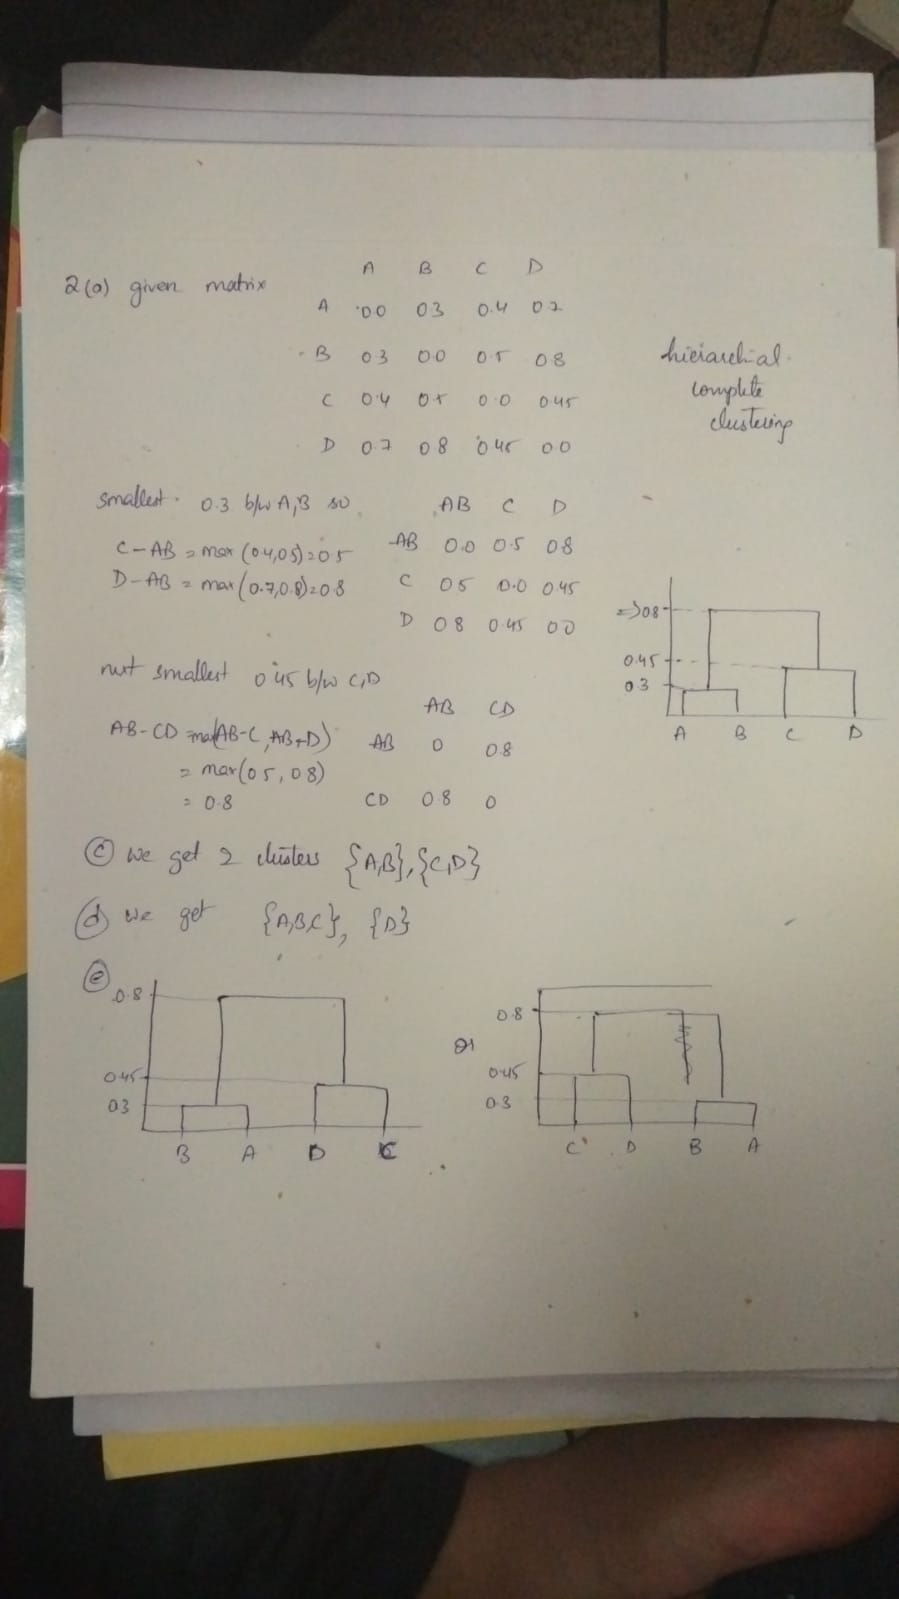

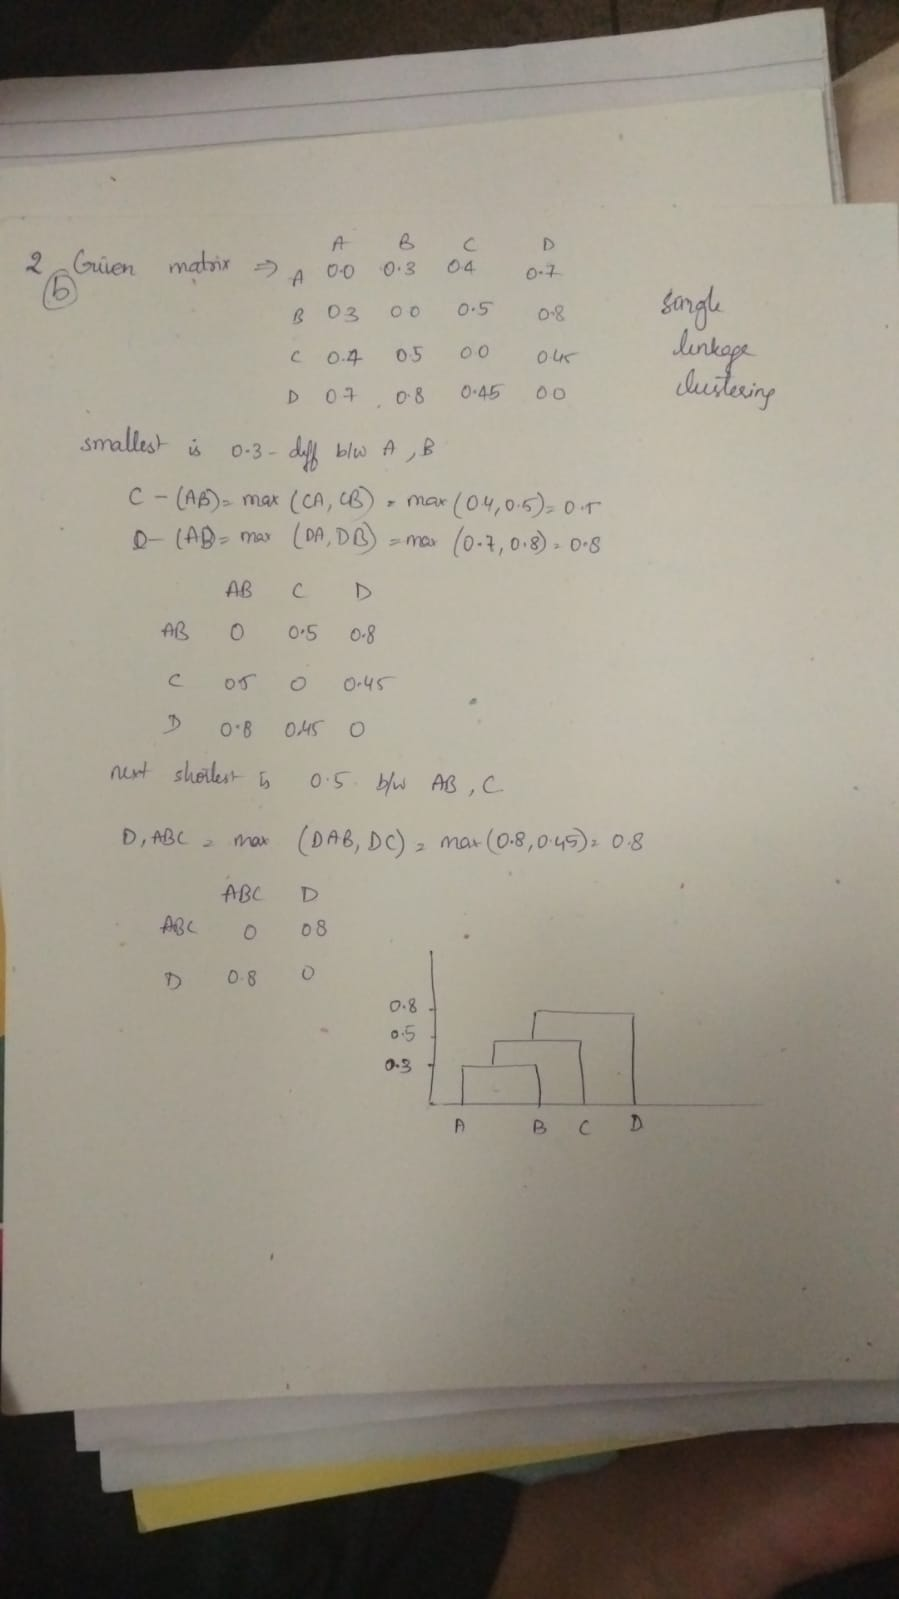